In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [ ]:
# NMF는 입력데이터가 모두 양수인 형태의(pixel 데이터와 같은) 데이터에 유용하다.
# NMF는 PCA와 달리 데이터의 직교성이 보장되지 않는데 이로 인해 데이터의 독립성이 더욱 잘 표현될수 있다.
# NMF는 PCA와 달리 성분의 갯수를 줄이면 전체 성분이 영향을 받는다.

In [4]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool) #0으로 가득찬 array 생성
# print(np.unique(people.target))
for target in np.unique(people.target): # 중복없이 출력 (0~61)
    mask[np.where(people.target==target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=0)

# print(X_people.shape,y_people)

(2063, 5655) [61 25  9 ...  9 37 22]


C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wlsgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


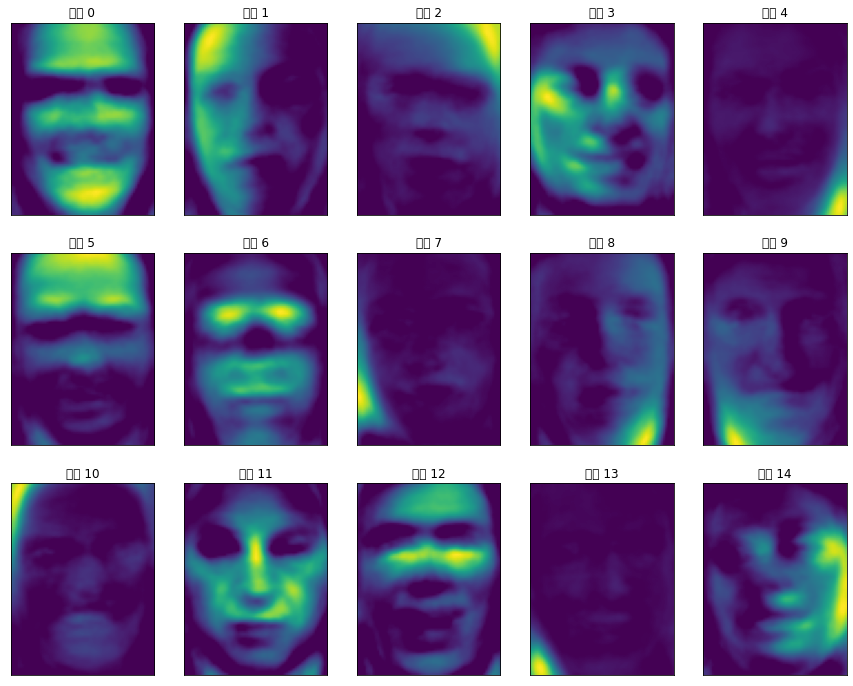

In [9]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
# print(nmf.components_)
for i, (component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))


In [10]:
print(X_train.shape)
print(nmf.components_.shape) 
# 5655개의 특성에 가중치 w를 부여해 새로운 특성 15개를 만든것을 확인
print(image_shape)
#

(1547, 5655)
(15, 5655)
(87, 65)
